# Mostra os graficos e dotplot para valores observados para uma iteracao do SWATCUP.

In [1]:
import glob
import os
import os
import time
import pandas as pd
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ITERATION_BASE_FOLDER = './iterations'
ITERATION_NAME = '20200731_outros_param'    #Quando None ele pega a iteracao mais recente

In [3]:
# Prepara path de diretorios
if ITERATION_NAME is None:
    # Pega diretorio mais novo
    directories = glob.glob(os.path.join(ITERATION_BASE_FOLDER, '*/'))
    iter_folder = max(directories, key=os.path.getmtime)
    print('Iteracao nao definida. Utilizando a iteracao mais recente')
else:
    # Se o nome foi definido usa o nome definido
    iter_folder = os.path.join(ITERATION_BASE_FOLDER, ITERATION_NAME)

echo_folder = os.path.join(iter_folder, 'Echo')
sufi_in_folder = os.path.join(iter_folder, 'Sufi2.In')
sufi_out_folder = os.path.join(iter_folder, 'Sufi2.Out')
                           
iter_folder

'./iterations/20200731_outros_param'

## Valores extraidos do modelo

In [4]:
# Coleta nome dos arquivos de dados extraidoa
#Se tiver mais de um arquivo com os nomes de variaveis (rch, sub, etc), colocar na lista
extracted_files_index = ['var_file_rch.txt']    
extracted_files = []
for f in extracted_files_index:
    file = os.path.join(sufi_in_folder, f)
    with open(file) as fo:
        extracted_files = extracted_files + fo.read().splitlines()
variable_id = { os.path.splitext(extracted_files[i])[0] : i for i in range(0, len(extracted_files) ) }
variable_id

{'FLOW_OUT_5': 0,
 'FLOW_OUT_8': 1,
 'FLOW_OUT_11': 2,
 'FLOW_OUT_13': 3,
 'FLOW_OUT_14': 4,
 'FLOW_OUT_17': 5,
 'FLOW_OUT_18': 6,
 'FLOW_OUT_21': 7,
 'FLOW_OUT_22': 8,
 'FLOW_OUT_23': 9,
 'FLOW_OUT_24': 10,
 'FLOW_OUT_25': 11,
 'FLOW_OUT_27': 12,
 'FLOW_OUT_29': 13,
 'FLOW_OUT_34': 14,
 'FLOW_OUT_36': 15,
 'FLOW_OUT_37': 16,
 'SED_OUT_5': 17,
 'SED_OUT_8': 18,
 'SED_OUT_14': 19,
 'SED_OUT_21': 20,
 'SED_OUT_24': 21,
 'SED_OUT_34': 22}

In [5]:
# Le todos arquivo de dados extraidos
extracted = []
batch_list = []
df_list = []
first = True
for file in extracted_files:
    print('Lendo arquivo: {}'.format(file))
    file = os.path.join(sufi_out_folder, file)
    with open(file) as fo:
        extracted_var = fo.readlines()
    extracted_var = [x.strip().split() for x in extracted_var]
    step_list = []
    value_list = []
    mat_list = []
    first = True
    batch_list = []
    for line in extracted_var:
        # Verifica se eh o numero da rodada
        if len(line) == 1:
            if not first:
                mat_list.append(value_list)
            batch_list.append(int(line[0]))
            value_list = []
            step_list = []
            first = False
        if len(line) == 2:
            step_list.append(int(line[0]))
            value_list.append(float(line[1]))
            
    mat_list.append(value_list)

    # cria dataframe
    df = pd.DataFrame(mat_list).transpose()
    # Seta nome de colunas
    df.columns = batch_list
    # Coloca os steps com indice
    df['step'] = pd.Series(step_list)
    df = df.set_index('step')
    
    # Coloca dataframe dentro da lista observados
    extracted.append(df)

Lendo arquivo: FLOW_OUT_5.txt
Lendo arquivo: FLOW_OUT_8.txt
Lendo arquivo: FLOW_OUT_11.txt
Lendo arquivo: FLOW_OUT_13.txt
Lendo arquivo: FLOW_OUT_14.txt
Lendo arquivo: FLOW_OUT_17.txt
Lendo arquivo: FLOW_OUT_18.txt
Lendo arquivo: FLOW_OUT_21.txt
Lendo arquivo: FLOW_OUT_22.txt
Lendo arquivo: FLOW_OUT_23.txt
Lendo arquivo: FLOW_OUT_24.txt
Lendo arquivo: FLOW_OUT_25.txt
Lendo arquivo: FLOW_OUT_27.txt
Lendo arquivo: FLOW_OUT_29.txt
Lendo arquivo: FLOW_OUT_34.txt
Lendo arquivo: FLOW_OUT_36.txt
Lendo arquivo: FLOW_OUT_37.txt
Lendo arquivo: SED_OUT_5.txt
Lendo arquivo: SED_OUT_8.txt
Lendo arquivo: SED_OUT_14.txt
Lendo arquivo: SED_OUT_21.txt
Lendo arquivo: SED_OUT_24.txt
Lendo arquivo: SED_OUT_34.txt


## Valores observados

In [7]:
# Coleta nome dos arquivos de dados observados
#Se tiver mais de um arquivo com os nomes de variaveis (rch, sub, etc), colocar na lista
observed_files = ['observed_rch.txt']
for f in observed_files:
    file = os.path.join(sufi_in_folder, f)
    with open(file) as fo:
        lines = fo.read().splitlines()
        # remove linhas em branco
        lines = list(filter(None, lines))
    # processa
    number_observed_var = int(lines[0].split(':')[0])
    print('Numero de variaveis declaradas: {}'.format(number_observed_var))
    config_list = []
    config_section = False
    first = True
    step_list = []
    value_list = []
    mat_list = []
    first = True
    for line in lines[1:]:
        p = line.split(':')
        if len(p) > 1:
            if not config_section:
                # Nao estava numa secao de configuracao. Abre um secao nova
                if not first:
                    config_list.append(var_config)
                    mat_list.append([step_list,value_list])
                first = False
                var_config =[]
                config_section = True
                step_list = []
                value_list = []
                    
            # tem um sinal de :, deve ser alguma configuracao
            var_config.append(line)
        else:
            config_section = False
            # Le dados
            observed_var = line.split()
            step_list.append(int(observed_var[0]))
            value_list.append(float(observed_var[2]))
    
    # Salva ultima iteracao
    config_list.append(var_config)
    mat_list.append([step_list, value_list])
    
    number_obs_detected = len(mat_list)
    if number_observed_var != number_obs_detected:
        print('Numero de variaveis detectadas diferente do declarado: {} != {}'.format(number_observed_var, number_obs_detected))
    

    # cria dataframe. Para manter correspondencia com os dados extraidos
    # é criada uma lista de dataframes
    observed = []
    obs_name_list = []
    for serie, config in zip(mat_list, config_list):
        # TODO: isso aqui pega no nome da variavel. Não é muito robusto. Melhorar se precisar
        name = (config[0].split(':')[0].strip())
        obs_name_list.append(name)
        df = pd.DataFrame({name:serie[1]})
        df['step'] = pd.Series(serie[0])
        df = df.set_index('step') 
        observed.append(df)
        
    # certifica que os dados observados estao na mesma ordem que os dados extraidos
    if len(obs_name_list) != len(variable_id):
        print('ATENCAO: o numero de variaveis extraidas eh diferente do numero de variaveis observadas: {} != {}'.format(len(obs_name_list),len(variable_id)))
    #ordered = []
    #for i, name in enumerate(obs_name_list):
    #    ordered.append(variable_id[name])
    #ordered = [variable_id[name] for name in obs_name_list]
    #obs_name_list[1],obs_name_list[2] = obs_name_list[2],obs_name_list[1]
    fix_order = [obs_name_list.index(name) for name in variable_id.keys()]
    observed = [observed[i] for i in fix_order]

Numero de variaveis declaradas: 23


## Parametros utilizados

In [9]:
param_file = os.path.join(sufi_out_folder, 'goal.txt')
params = pd.read_csv(param_file, skiprows=3, decimal='.', delim_whitespace=True)  
params = params.set_index('Sim_No.')

In [10]:
params

,1:V__GW_REVAP.gw,2:V__ESCO.hru,3:V__CH_N2.rte,4:V__CH_K2.rte,5:V__ALPHA_BNK.rte,6:R__SOL_AWC(..).sol,7:R__SOL_K(..).sol,8:R__SOL_BD(..).sol,9:V__SFTMP.bsn,goal_value
Sim_No.,,,,,,,,,,
1,0.083,0.975,0.1575,129.375,0.415,0.193,0.520,0.4185,3.45,-187.155453
2,0.135,0.955,0.1455,110.625,0.325,0.235,-0.776,0.1325,2.05,-149.981046
3,0.069,0.949,0.2475,86.875,0.845,-0.005,0.696,0.2535,-3.45,-157.622861
4,0.001,0.851,0.1215,121.875,0.795,0.313,0.792,-0.3845,-4.95,-105.251903
5,0.139,0.855,0.0465,15.625,0.835,-0.029,-0.280,-0.4065,-4.35,-118.034554
...,...,...,...,...,...,...,...,...,...,...
96,0.065,0.965,0.1335,120.625,0.555,0.277,0.536,0.0665,-2.45,-162.271925
97,0.051,0.867,0.2415,73.125,0.275,0.379,0.040,0.0335,-2.05,-103.336311
98,0.121,0.961,0.2535,54.375,0.065,-0.161,0.424,0.2975,-2.25,-128.079553


In [11]:
goal_swatcup = params['goal_value']
params = params.drop(columns=['goal_value'])

## Processa e visualiza dados por bacia

In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
def evaluation_metric(function, simulated, observed):
    import hydroeval
    if function == 'nse':
        return hydroeval.evaluator(hydroeval.nse, simulated.to_numpy(), observed.to_numpy())
    if function == 'rmse':
        return hydroeval.evaluator(hydroeval.rmse, simulated.to_numpy(), observed.to_numpy())
    if function == 'pbias':
        return hydroeval.evaluator(hydroeval.pbias, simulated.to_numpy(), observed.to_numpy())
    else:
        print('Funcao desconhecida {}'.format(funtion))

In [13]:
variable_id

{'FLOW_OUT_5': 0,
 'FLOW_OUT_8': 1,
 'FLOW_OUT_11': 2,
 'FLOW_OUT_13': 3,
 'FLOW_OUT_14': 4,
 'FLOW_OUT_17': 5,
 'FLOW_OUT_18': 6,
 'FLOW_OUT_21': 7,
 'FLOW_OUT_22': 8,
 'FLOW_OUT_23': 9,
 'FLOW_OUT_24': 10,
 'FLOW_OUT_25': 11,
 'FLOW_OUT_27': 12,
 'FLOW_OUT_29': 13,
 'FLOW_OUT_34': 14,
 'FLOW_OUT_36': 15,
 'FLOW_OUT_37': 16,
 'SED_OUT_5': 17,
 'SED_OUT_8': 18,
 'SED_OUT_14': 19,
 'SED_OUT_21': 20,
 'SED_OUT_24': 21,
 'SED_OUT_34': 22}

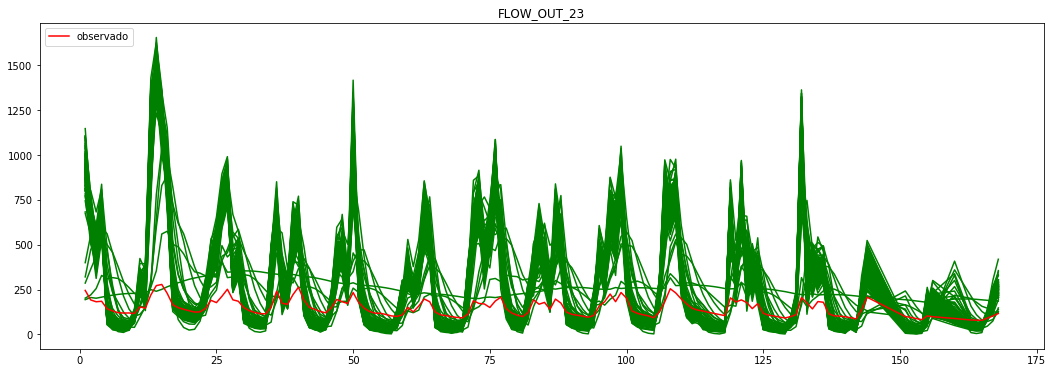

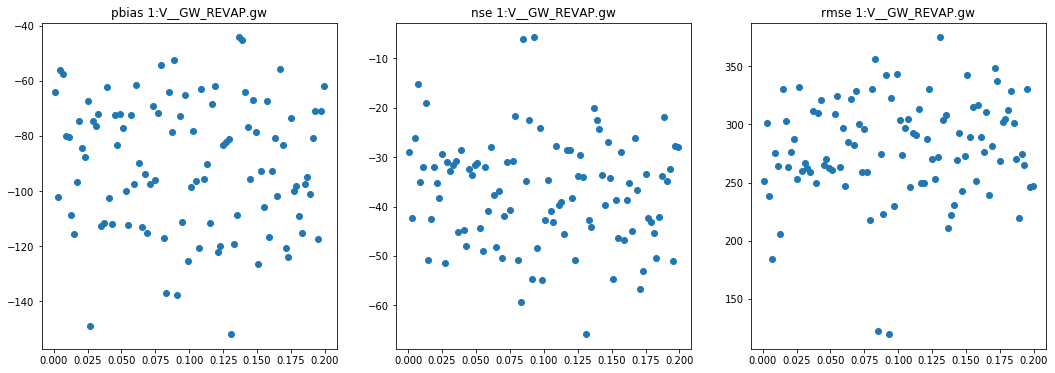

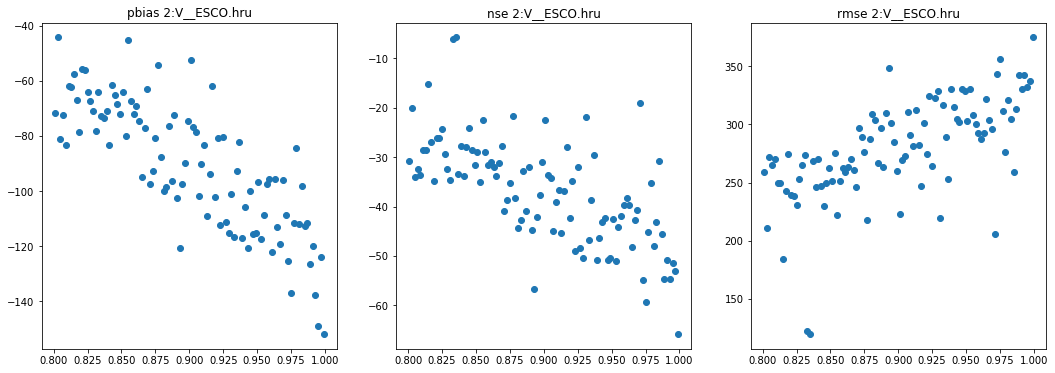

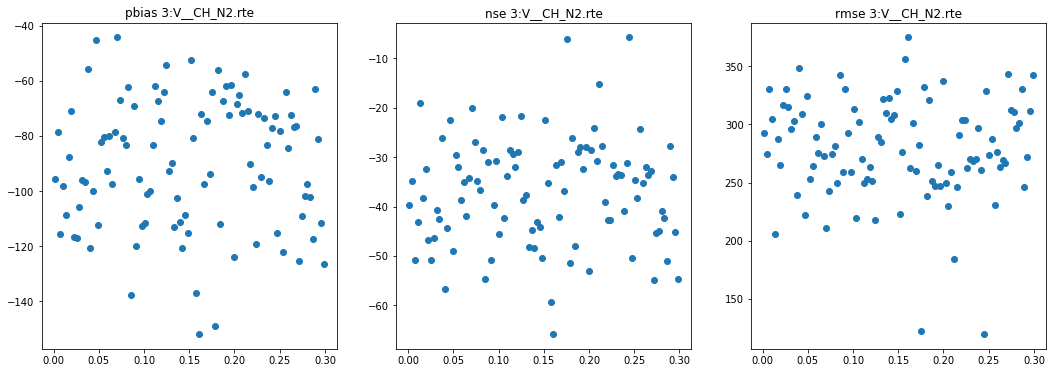

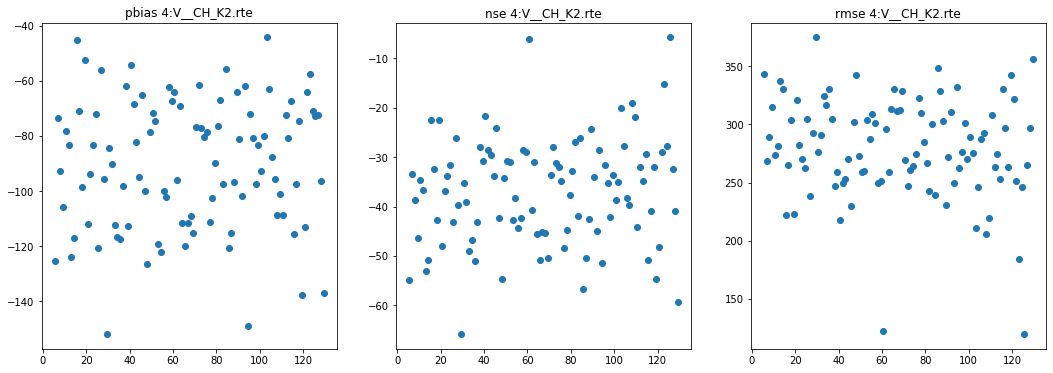

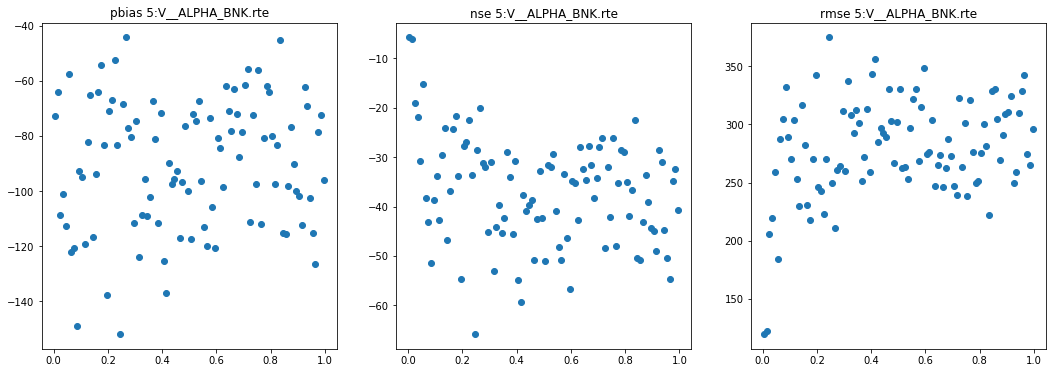

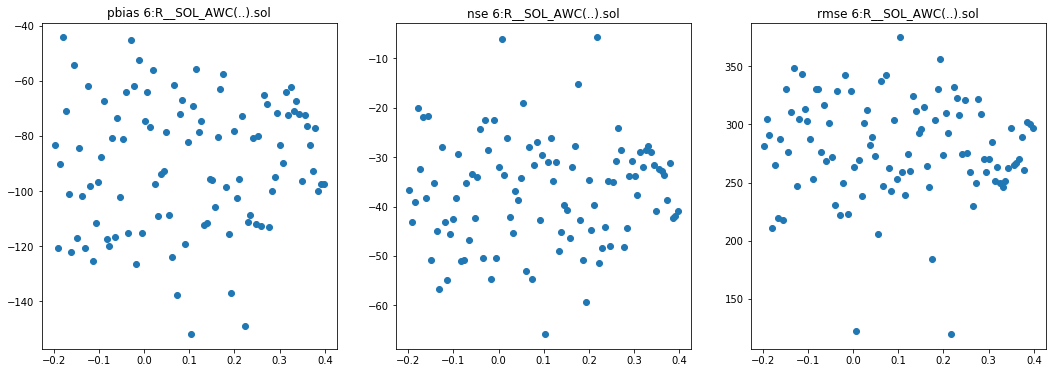

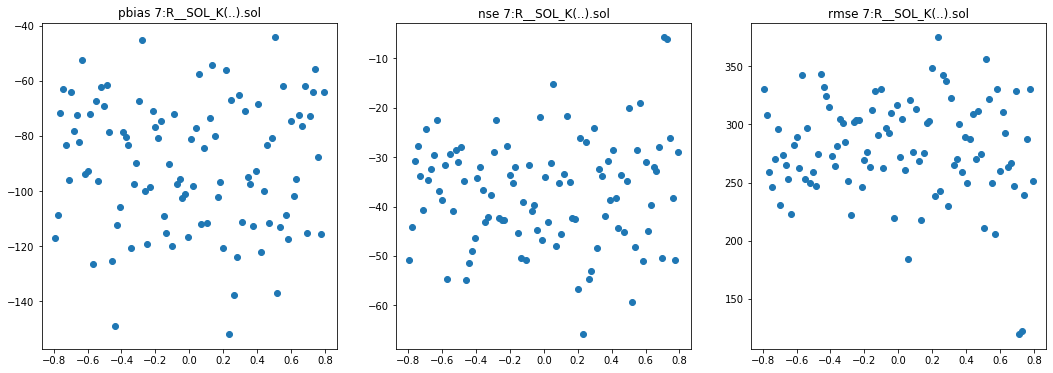

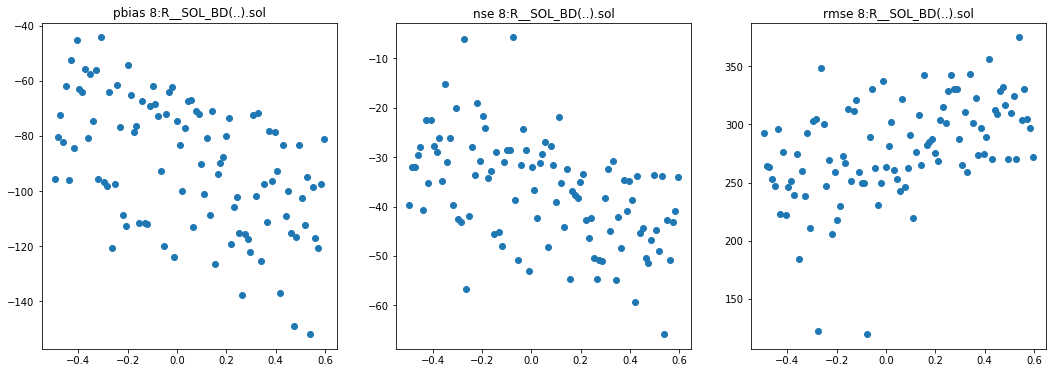

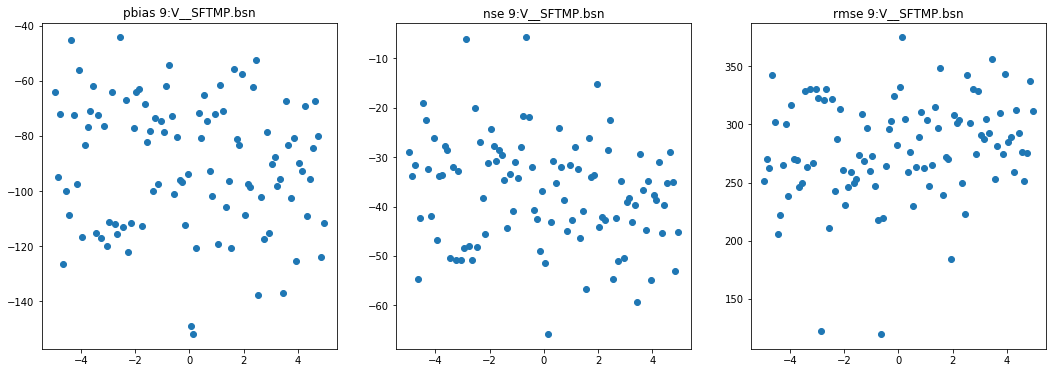

In [42]:
var_name = 'FLOW_OUT_23'
# nse,kge, kgeprime, kgenp, rmse, mare, pbias
observed_data = observed[variable_id[var_name]]
simulated_data = extracted[variable_id[var_name]]

# Apresenta dados simulados
plt.figure(figsize=(18, 6))
l = plt.plot(simulated_data, color='green', label='_simulado')
#l=plt.legend()
#l.get_texts()[0].set_text('make it short')
plt.title(var_name)

# Apresenta dados simulados

plt.plot(observed_data, color='red', label='observado')
plt.title(var_name)
plt.legend(loc="upper left")
#plt.legend(teste_data.columns)

pbias = evaluation_metric('pbias', simulated_data, observed_data)
nse = evaluation_metric('nse', simulated_data, observed_data)
rmse = evaluation_metric('rmse', simulated_data, observed_data)


for par in params.columns:
    plt.figure(figsize=(18, 6))
    plt.subplot(1,3,1)
    plt.plot(params[par], pbias, 'o')
    plt.title('pbias ' + par)
    plt.subplot(1,3,2)
    plt.plot(params[par], nse, 'o')
    plt.title('nse ' + par)
    plt.subplot(1,3,3)
    plt.plot(params[par], rmse, 'o')
    plt.title('rmse ' + par)
    
    plt.show()